# 应用及实践
EM算法的一个重要应用场景就是高斯混合模型的参数估计。    
  
混合高斯模型的应用场景包括：  

1. 数据集分类，如会员分类；  
2. 图像分割以及以及特征抽取，例如在视频中跟踪人物以及区分动作，识别汽车、建筑物等；  
3. 语音分割以及特征特征抽取，例如从一堆杂乱的声音中提取某个人的声音，从音乐中提取背景音乐，从大自然中提取地震的声音等。    
  
GMM与k-means聚类相似，也使用迭代算法计算并最终收敛到局部最优。  
但高斯混合模型在各类尺寸不同、聚类间有相关关系的的时候可能比k-means聚类更合适；  
GMM 是基于概率密度函数进行学习，所以除了在聚类应用外，还经常应用于密度检测（density estimation ）；  
另外， k-means 的结果是每个观测点一定被分类到某个数据集类别中，而 GMM 则给出的是被分类到不同数据集类别中的概率（又被称为软分类soft assignment ）。  

## 案例一

In [8]:
#coding:utf-8
import numpy as np
from sklearn import mixture
#生成随机观测点，含有2个聚集核心
#sklearn.mixture.GaussianMixture

obs = np.concatenate((np.random.randn(100, 1), 10 + np.random.randn(300, 1)))
clf = mixture.GaussianMixture(n_components=2)
print(obs[:10])
clf.fit(obs)

# 预测
# 结果是直接返回类别 1 2 3 4，是否有可能返回其中心距离？
print(clf.predict([[0], [2], [9], [10]]))

[[-1.12759279]
 [-0.25217693]
 [ 1.94162999]
 [ 0.67272453]
 [-0.14456734]
 [ 0.39849287]
 [ 1.07143404]
 [ 0.02402222]
 [ 0.75622049]
 [-1.27006532]]
[1 1 0 0]


## 案例二

[[0.    0.531 0.469 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]]


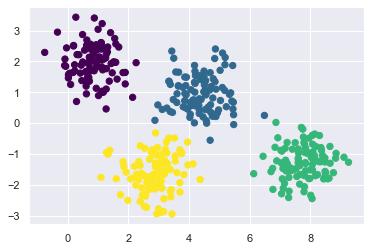

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#产生实验数据
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] #交换列是为了方便画图

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


#由于GMM有一个隐含的概率模型，因此它也可能找到簇分配的概率结果——在Scikit-Learn中用predict_proba方法
#实现。这个方法返回一个大小为[n_samples, n_clusters]的矩阵，矩阵会给出任意属于某个簇的概率
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

## 案例三 对人的身高进行聚类

均值 = 
 [[160.38747559  55.4433385 ]
 [171.98586562  65.0909003 ]]
方差 = 
 [[[19.90672898 12.65154028]
  [12.65154028 32.66237448]]

 [[32.35950039 20.26589001]
  [20.26589001 89.43163371]]]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


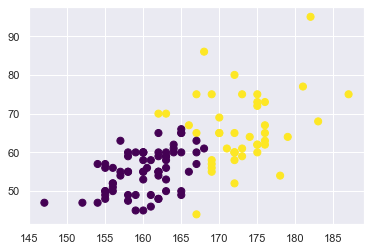

In [37]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture

## 数据加载
data = pd.read_csv('./HeightWeight.csv')
data_x = data[data.columns[1:]]
data_y = data[data.columns[0]]
data.head()

## 模型创建及训练
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=28)
gmm.fit(data_x)

## 模型相关参数输出
print ('均值 = \n', gmm.means_)
print ('方差 = \n', gmm.covariances_)

# 获取预测值
y_hat = gmm.predict(data_x)
print(y_hat)
print(data_y.values.T)
plt.scatter(data_x['Height(cm)'], data_x['Weight(kg)'], c=y_hat, s=50, cmap='viridis');


## 案例四 客户消费数据

In [72]:
import numpy as np
import pandas as pd

data = pd.read_excel('.\客户年消费数据.xlsx')

# 数据预处理
features = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']]
# 剔除极值或异常值
ids = []
for i in list(features.columns):
    q1 = np.percentile(features[i], 25)
    q3 = np.percentile(features[i], 75)
    intervel = 1.6*(q3 - q1)/2
    low = q1 - intervel
    high = q3 + intervel
    ids.extend(list(features[(features[i] <= low) |
                             (features[i] >= high)].index))
ids = list(set(ids))
features = features.drop(ids)


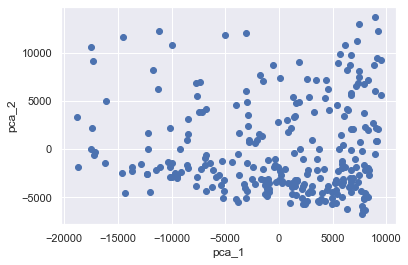

In [73]:
# 数据降至二维（PCA）
# 计算每一列的平均值
meandata = np.mean(features, axis=0)  
# 均值归一化
features = features - meandata    
# 求协方差矩阵
cov = np.cov(features.transpose())
# 求解特征值和特征向量
eigVals, eigVectors = np.linalg.eig(cov) 
# 选择前两个特征向量
pca_mat = eigVectors[:, :2]
pca_data = np.dot(features , pca_mat)
pca_data = pd.DataFrame(pca_data, columns=['pca1', 'pca2'])

# 两个主成分的散点图
plt.subplot(111)
plt.scatter(pca_data['pca1'], pca_data['pca2'])
plt.xlabel('pca_1')
plt.ylabel('pca_2')
plt.show()

In [74]:
import matplotlib as mpl

#  定义make_ellipses函数，根据GMM算法输出的聚类类别，画出相应的高斯分布区域
def make_ellipses(gmm, ax, k):
    for n in np.arange(k):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle)
        # ax = plt.gca()
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.3)
        ax.add_artist(ell)

C:\Users\never\Miniconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\never\Miniconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\never\Miniconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

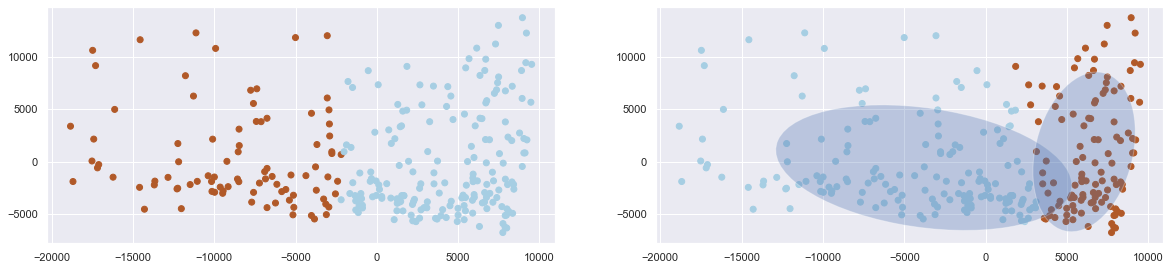

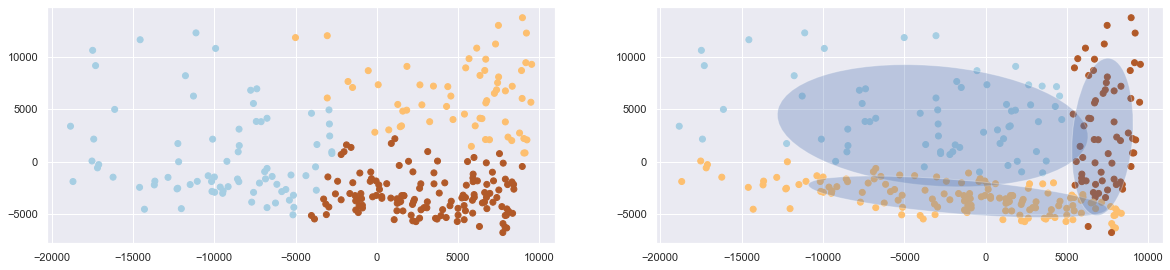

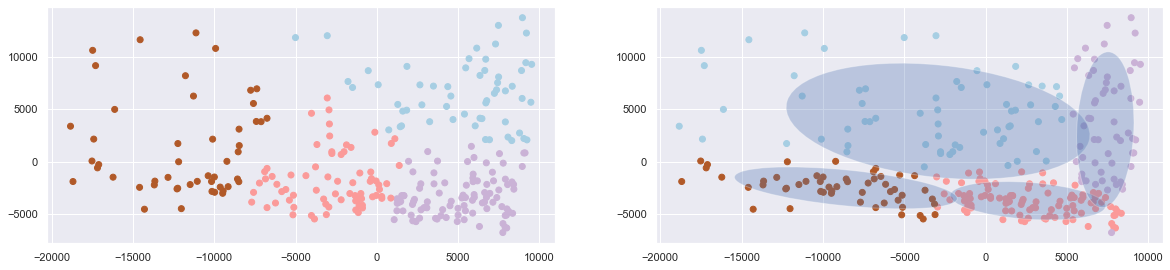

In [75]:
# 根据模型输出，画出聚类结果对比图：
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

score_kmean = []
score_gmm = []
random_state = 87
n_cluster = np.arange(2, 5)
for i, k in zip([0, 2, 4, 6], n_cluster):
    # K-means聚类
    kmeans = KMeans(n_clusters=k, random_state=random_state)
    cluster1 = kmeans.fit_predict(pca_data)
    score_kmean.append(silhouette_score(pca_data, cluster1))

    # gmm聚类
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=random_state)
    cluster2 = gmm.fit(pca_data).predict(pca_data)
    score_gmm.append(silhouette_score(pca_data, cluster2))

    # 聚类效果图
    plt.figure(figsize=(20,20))
    plt.subplot(421+i)
    plt.scatter(pca_data['pca1'], pca_data['pca2'], c=cluster1, cmap=plt.cm.Paired)
    if i == 6:
        plt.xlabel('K-means')
    plt.subplot(421+i+1)
    plt.scatter(pca_data['pca1'], pca_data['pca2'], c=cluster2, cmap=plt.cm.Paired)
    make_ellipses(gmm, plt.subplot(421+i+1), k)
    if i == 6:
        plt.xlabel('GMM')
plt.show()

# 参考资料
1. [混合高斯模型GMM](http://www.dataivy.cn/blog/%E6%B7%B7%E5%90%88%E9%AB%98%E6%96%AF%E6%A8%A1%E5%9E%8Bgaussian-mixture-model_gmm/)
2. [Comparing different clustering algorithms on toy datasets](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)
3. [GMM与K-means聚类效果实战](https://www.jianshu.com/p/a4d8fa39c762)
4. [Scikit-Learn学习笔记——高斯混合模型(GMM)应用：分类、密度估计、生成模型](https://blog.csdn.net/jasonzhoujx/article/details/81947663?depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-1&utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromBaidu-1)
5. [机器学习之高斯混合模型（一）GMM实战——根据身高体重进行人群聚类](https://blog.csdn.net/qq872890060/article/details/100030667)
6. [GMM covariances](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html)